In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [12]:
N = 2000
dim = 2
density = 0.05
size = np.sqrt(N / density)

In [13]:
def generate_ensemble(remove_dimers = False, threshold = 0.5):
    pos = np.random.uniform(0, size, (N, dim))
    if remove_dimers:
        filtered_pos = []
        for i in range(len(pos)):
            dist = np.linalg.norm(pos - pos[i], axis=1)
            dist = np.sort(dist)
            if(dist[1] > threshold):
                filtered_pos.append(pos[i])
        pos = np.array(filtered_pos)
    return pos

def decay(pos, times):
    dec = np.ones(len(times))
    for i in range(len(pos)):
        r = np.linalg.norm(pos - pos[i], axis=1)
        r = r[r > 0]
        J = 1 / r**3

        for j_val in J:
            dec *= np.cos(j_val * times)
    return dec/dec[0]
    

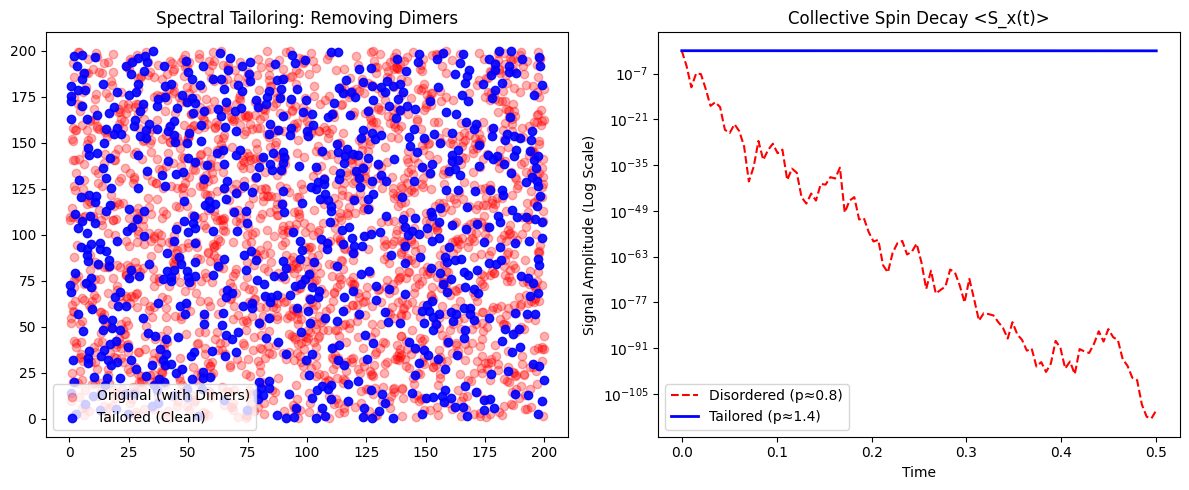

In [14]:
times = np.linspace(0, 0.5, 100)
pos_raw = generate_ensemble(remove_dimers=False)
pos_clean = generate_ensemble(remove_dimers=True, threshold=2.5)

decay_raw = decay(pos_raw, times)
decay_clean = decay(pos_clean, times)

# 3. Visualization
plt.figure(figsize=(12, 5))

# Plot A: The Spatial Distribution
plt.subplot(1, 2, 1)
plt.scatter(pos_raw[:,0], pos_raw[:,1], alpha=0.3, label='Original (with Dimers)', color='red')
plt.scatter(pos_clean[:,0], pos_clean[:,1], alpha=0.9, label='Tailored (Clean)', color='blue')
plt.title("Spectral Tailoring: Removing Dimers")
plt.legend()

# Plot B: The Signal Decay
plt.subplot(1, 2, 2)
plt.plot(times, np.abs(decay_raw), 'r--', label='Disordered (p≈0.8)')
plt.plot(times, np.abs(decay_clean), 'b-', linewidth=2, label='Tailored (p≈1.4)')
plt.yscale('log')
plt.title("Collective Spin Decay <S_x(t)>")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude (Log Scale)")
plt.legend()

plt.tight_layout()
plt.show()